## Problem 3:
Write a Python Code that creates an RBF Network to approximate the mapping defined by:
#### f(x1, x2)= { +1 , x1^2 +  x2^2 <=1 ; -1 , x1^2 +  x2^2 >1 }
#### over region -2 < x1 < +2 and -2 < x2 < +2

As a training set, use 441 randomly sampled data points defined as:
#### x = (xi , xj)
#### xi = -2 + 0.2i ; i = 0,1,…….,20
#### xj = -2 + 0.2j ; j = 0,1,…….,20

1.Carry out the design of RBF NN based on Gaussian kernel functions with constant spread function and using all the points in the training set as centers of the RB functions. Compare the performance results (mean square error) as you vary the spread parameter while keeping it the same for all kernel functions. Discuss your findings.

2.Perform the design of the RBF NN, using this time only 150 centers, choosing the centers using two approaches:a)Randomly select the centers from the input data. b)Use K-Means algorithm to find the centers. You can use a Kmeans function defined in sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) or create your own.Keep the spread parameter fix for all kernel functions.

Compare the performance of this network to the one designed in part (1)


## Solution:
Radial Basis Function Neural Network or RBFNN is one of the fast, and effective algorithms of machine learning. It consists of three layers : input, hidden and output , and can be used to solve both classification and regression problems. 

In given question, the points will be calculated through the xi and xj equation.here, xi and xj represents as two features and a point at x = (xi,xj).

The target here is classification problem , which will be computed using function f(x1,x2).
This, function represents a circle equation and classifies the datapoints into two classes +1 and -1 . So, +1 class consists of the points outside the circle and -1 reperesents the points inside the circle.

This is a non linear classification problem and cannot be solved without computing third dimension . So, here Non-linear Gaussian function RBF will be used. RBF Network functions as follows:
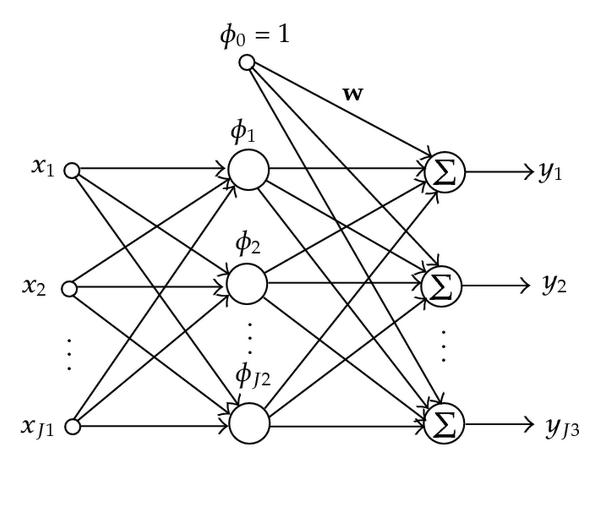

RBF network is a hybrid approach and has two stage learning strategy:

1) firstly, the parameters of radial basis function namely, centres and width will be computed using unsupervised algorithms.

a) In our model,  the centres will be chosen by three different methods which are using same input set as centroids, randomly and by using KMeans clustering algorithm.

b) Sigma values wil be provided in some range and then, evaluated the for best performance. It will also be computed by calculation. Here, accuracy and Mean_Squared_Error will be checked for evaluation.

2) Now, the weights between output and kernel function will be computed using supervised method.

In [2]:
# Importing all necessary liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

### Dataset creation:
The dataset will be computed and classified according to given function . Then, it will be divided into features and targets.

In [4]:
# Creating the dataset
out_list= []
in_l1=[]
in_l2=[]
x1_x2=[]
for i in range(21):
    for j in range(21):
        xi = -2 + (2/10)*i
        xj= -2 + (2/10)*j
        y = xi**2 + xj**2
        # classifying according to circle equation
        if y <=1:
            out= 1
        else:
            out=-1
        in_l1.append(xi)
        in_l2.append(xj)
        out_list.append(out)
        x1_x2.append(y)

In [5]:
# merging in and out datalists
features=pd.DataFrame(in_l1, columns= ['x1'])
features['x2']= in_l2
target= pd.DataFrame(out_list, columns= ['y'])
df= pd.concat([features, target], axis =1)
# print(" The features are \n {} \n".format(features.head()))
# print("The targets are \n {} \n".format(target.head()))
print("The data is represented in the following form")
display(df.head())

The data is represented in the following form


,x1,x2,y
0,-2.0,-2.0,-1
1,-2.0,-1.8,-1
2,-2.0,-1.6,-1
3,-2.0,-1.4,-1
4,-2.0,-1.2,-1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      441 non-null    float64
 1   x2      441 non-null    float64
 2   y       441 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 10.5 KB


### Visualization the dataset:
Through 3D representation , it is visible that this non linear data can also be classified using a hyper plane, but in 2D, its not possible to classify the data.

Text(0.5, 0.92, ' 3D plotting of Data \n')

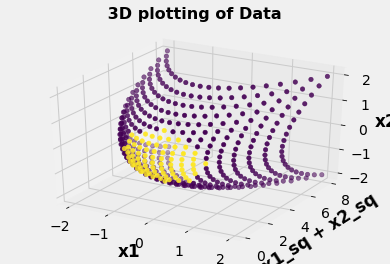

In [130]:
#plotting 3D representation of data
plt.style.use('fivethirtyeight')
ax= plt.axes(projection="3d")
ax.scatter3D(in_l1,x1_x2,in_l2, c= out_list)
ax.set_xlabel("x1", fontweight='bold')
ax.set_ylabel("x1_sq + x2_sq",fontweight='bold')
ax.set_zlabel("x2",fontweight='bold')
ax.set_title(" 3D plotting of Data \n",fontsize=16, fontweight='bold')

Text(0.5, 1.0, '2D representation of Data \n')

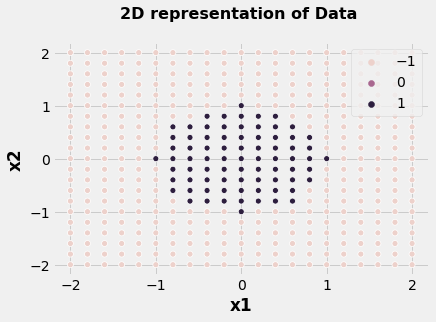

In [102]:
# 2D representation of data
sns.scatterplot(in_l1,in_l2,hue = out_list)
plt.xlabel("x1",fontweight="bold")
plt.ylabel("x2",fontweight="bold")
plt.title("2D representation of Data \n",fontsize=16,fontweight="bold")

### Train_Test_Split 
we will split the data into training and testing set with 80% and 20% of data respectively.

In [111]:
# Splitting data for test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=98)

## Designing RBF:
For designing rbf network, various parameters are required:
In the hidden node, parameters of activation function are centre and width, which are also called centroids/basis and sigma(spread parameter).Also, as per the question, constant spread parameter should be used so,for start we will compute sigma.

1) Computing sigma

2) Then, we need to find the centers which further depends upon no. of centers to be used and the method by which centres must be chosen.

3) After, achieving our centers , we will compute phi using training set and  gaussian function i.e., ϕ(X)=e(−||X−μ||^2/2σ^2).

4) Once phi is achieved then, weights will be calculated as W=((ϕT.ϕ)^−1)ϕTy.

5) So, weights are achieved , now to predict the values y or target, we will compute the phi values of the test data and then solve the output of test data as:it can be done as: Y = w*ϕ.

6) Now , one more step is required to classify the output points into two classes +1 and -1.

In above explaination, ϕ(x) is kernel , x are the inputs , μ represents the centroids , σ is width parameter , w leads to weight or weight matrix. and Y is predicted output.

In implementation, RBF function has arguments as RBF(x,y,num_basis, sigma, method_basis) ,
where, x and y are training data x_train and y_train;
num_basis is number of centroids to be used and it is an integer value ;
sigma is spread parameter or width and it can have float values ;
then , there is method basis which asks for the method to be used in order to choose centroids. It has string values as "same" that is same centroids as input set , "random" is to choose the centroids randomly and "kmean" to choose centroids by KMeans clustering algotithms.

In [112]:
# To compute sigma from training data
def get_sigma(x):
    xc= np.dot(x,x.T)
    xn= np.repeat(np.diag(np.dot(x,x.T)).reshape(1,-1), np.size(x, axis=0), axis=0)
    sigma=np.sqrt(np.median(xn - 2*xc + xn.T))
    return(sigma)
computed_sigma = get_sigma(x_train)
print("The computed sigma is {} ".format(computed_sigma))

The computed sigma is 2.12602916254693 


In [113]:
# To get centroids 
def get_basis(x, num_basis, method_basis):
    if method_basis== "kmean":
        km= KMeans(n_clusters= num_basis, random_state=0).fit(x)
        cent= pd.DataFrame(km.cluster_centers_)
    elif method_basis=="random":
        idx = np.random.randint(np.size(x, axis=0),size = num_basis)
        cent= x.iloc[idx, :]
    elif method_basis== "same":
        cent = x
    return(cent)

# To solve phi value
def compute_phi(x, centers, sigma):
    n = x.shape[0]
    d = centers.shape[0]
    rbfs=[]
    for i in range(len(x)):
        for j in range(len(centers)):
            rbfs.append(np.exp((-0.5)*((np.linalg.norm(x.iloc[i] - centers.iloc[j]))**2)/(sigma**2)))
    bias= np.asmatrix(np.ones((x.shape[0],1)))
    rbfs= np.array(rbfs).reshape(n,d)
    phi=np.hstack((bias,rbfs))
    return(phi)

# RBF implementation i.e., computing weights from trainig set and predicting the output
def RBF(x,y,num_basis, sigma, method_basis):
    basis = get_basis(x, num_basis, method_basis)
    phi = compute_phi(x, basis, sigma)
    W = np.dot(np.dot(np.dot(phi.T,phi)**-1,phi.T),y)
    def predict_test(xtest):
        phi_test = compute_phi(xtest, basis, sigma)
        pred= np.dot(phi_test,W)
        # classifying the output
        ytest=[]
        for pr in pred:
            if pr <=1:
                out= 1
            else:
                out=-1
            ytest.append(out)
        return(ytest)
    return(predict_test)

## Problem 3
## Part 1: Using same centroids as training input

### Prediction:
The first prediction is achieved using computed sigma and keeping the centroids same as the input training data.

In [114]:
# predicting test set
predict= RBF(x_train, y_train,x_train.shape[0],computed_sigma, method_basis="same")
prediction_train = predict(x_train)
prediction_test = predict(x_test)

### Results:

In [135]:
# results of predicted accuracy and MSE of both training and testing data 
accuracy_train = metrics.accuracy_score(y_train,prediction_train)
mse_train= mean_squared_error(y_train,prediction_train)
accuracy_test = metrics.accuracy_score(y_test,prediction_test)
mse_test= mean_squared_error(y_test,prediction_test)
print("The accuracy for training set using computed sigma is {} \n".format(accuracy_train))
print("The MSE for training set using computed sigma is {} \n".format(mse_train))
print("The accuracy for test set using computed sigma is {} \n".format(accuracy_test))
print("The MSE for test set using computed sigma is {} \n".format(mse_test))

The accuracy for training set using computed sigma is 0.6335227272727273 

The MSE for training set using computed sigma is 1.4659090909090908 

The accuracy for test set using computed sigma is 0.7528089887640449 

The MSE for test set using computed sigma is 0.9887640449438202 



### Plotting of predictions:

Text(0.5, 1.0, 'The test data prediction plotting at computed sigma = 2.12')

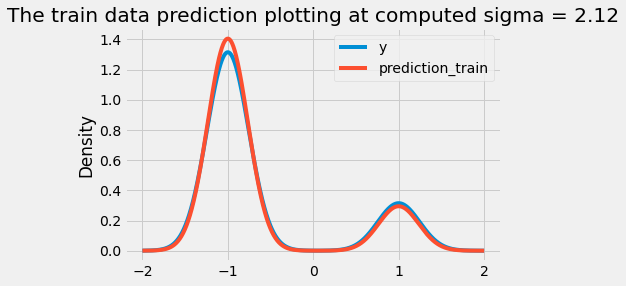

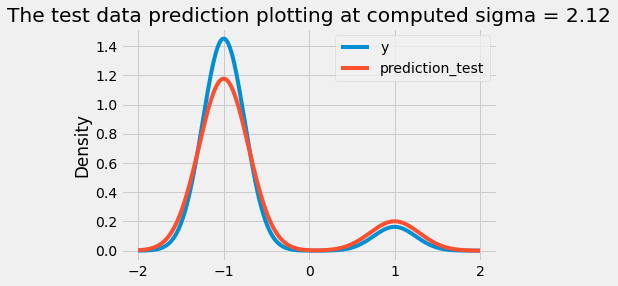

In [162]:
# Following is plotting and prediction of train and test test at sigma = 2.12
plot_train= y_train.copy()
plot_train['prediction_train']=prediction_train
plot_test = y_test.copy()
plot_test['prediction_test'] = prediction_test
plot_train.plot(kind='density')
plt.title("The train data prediction plotting at computed sigma = 2.12")
plot_test.plot(kind='density')
plt.title("The test data prediction plotting at computed sigma = 2.12")

## Evaluating best spread parameter value:
for evaluation MSE and accuracy score will be used. More the accuracy, least the error.

#### The Following will show the variation in accuracy and MSE due to variation in sigma values ranging from 0 to 1:

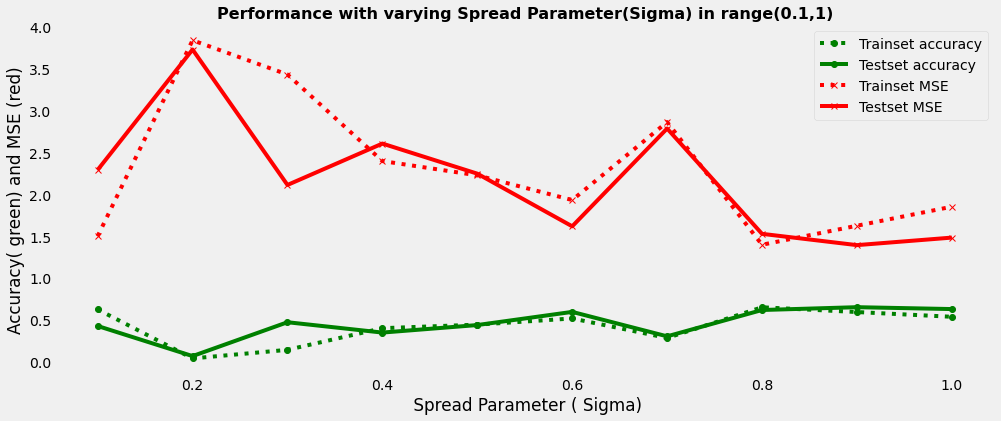

In [140]:
# To evaluate on range of sigma(0.1,1) and plotting it through line graph
acc_train=[]
acc_test=[]
error_train=[]
error_test= []
for i in range(1,11):
    n=i/10
    predict1= RBF(x_train, y_train, x_train.shape[0], n, method_basis= "same")
    acc_train.append(metrics.accuracy_score(y_train,predict1(x_train)))
    acc_test.append(metrics.accuracy_score(y_test,predict1(x_test)))
    error_train.append(mean_squared_error(y_train,predict1(x_train)))
    error_test.append(mean_squared_error(y_test,predict1(x_test)))
range1 =np.arange(0.1,1.1,0.1)
plt.figure(figsize=(15,6))
plt.plot(range1,acc_train,color="green",marker='o',linestyle='dotted')
plt.plot(range1,acc_test,color="green",marker='o')
plt.plot(range1,error_train,color="red",marker='x',linestyle='dotted')
plt.plot(range1,error_test,color="red",marker='x')
plt.xlabel(" Spread Parameter ( Sigma)")
plt.ylabel("Accuracy( green) and MSE (red)")
plt.title("Performance with varying Spread Parameter(Sigma) in range(0.1,1)", fontsize=16, fontweight='bold')
plt.legend(['Trainset accuracy','Testset accuracy', 'Trainset MSE', 'Testset MSE'])
plt.grid()

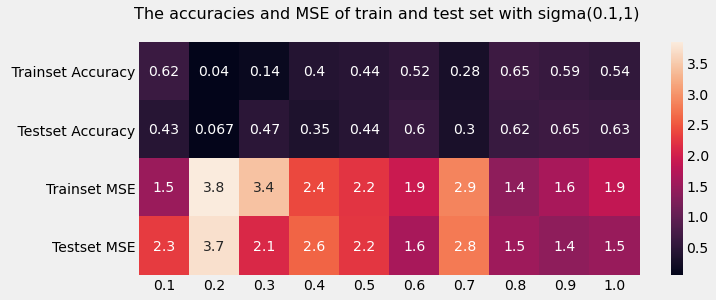

In [141]:
#To have a better view of evaluation with heatmap
acc_mse1=pd.DataFrame([acc_train,acc_test,error_train,error_test],index=[" Trainset Accuracy"," Testset Accuracy",
                    "Trainset MSE", "Testset MSE"],columns=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.figure(figsize=(10,4))
sns.heatmap(acc_mse1,annot=True)
plt.title('The accuracies and MSE of train and test set with sigma(0.1,1) \n',fontsize=16)
plt.show()

In [164]:
# The dataframe displaying accuracies and MSE
print("The accuracies and MSE using same input as centroids over sigma range(0.1,1) is as follows")
display(acc_mse1)

The accuracies and MSE using same input as centroids over sigma range(0.1,1) is as follows


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
Trainset Accuracy,0.625000,0.039773,0.142045,0.400568,0.443182,0.517045,0.284091,0.650568,0.593750,0.536932
Testset Accuracy,0.426966,0.067416,0.471910,0.348315,0.438202,0.595506,0.303371,0.617978,0.651685,0.629213
Trainset MSE,1.500000,3.840909,3.431818,2.397727,2.227273,1.931818,2.863636,1.397727,1.625000,1.852273
Testset MSE,2.292135,3.730337,2.112360,2.606742,2.247191,1.617978,2.786517,1.528090,1.393258,1.483146


Here, from the figure it is clear that the maximum accuracy amd least mean squared error is achieved at sigma = 0.8 , but still least accurate as compared to sigma= 2.12

#### The Following will show the variation in accuracy and MSE due to variation in sigma values ranging from 0 to 10:

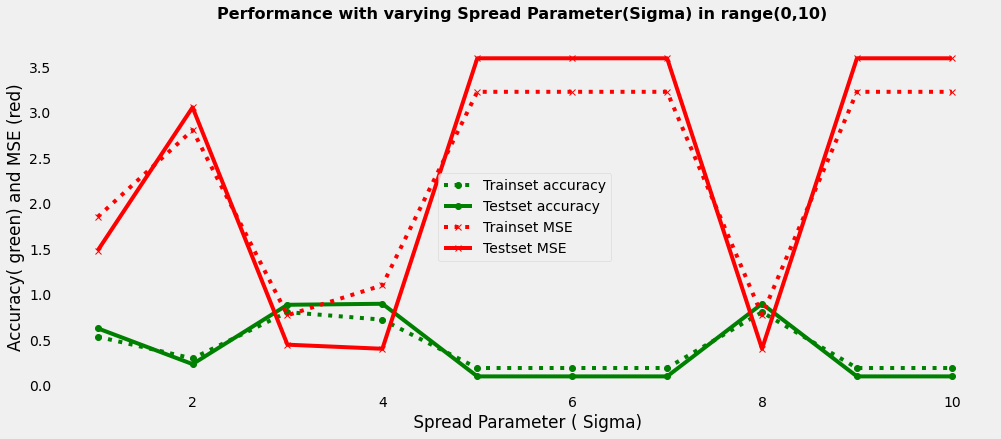

In [142]:
# To evaluate on range of sigma(0.1,1) and plotting it through line graph
acc_train2=[]
acc_test2=[]
error_train2=[]
error_test2= []
for i in range(1,11):
    predict2= RBF(x_train, y_train, x_train.shape[0], i, method_basis= "same")
    acc_train2.append(metrics.accuracy_score(y_train,predict2(x_train)))
    acc_test2.append(metrics.accuracy_score(y_test,predict2(x_test)))
    error_train2.append(mean_squared_error(y_train,predict2(x_train)))
    error_test2.append(mean_squared_error(y_test,predict2(x_test)))
range2 =np.arange(1,11)   
plt.figure(figsize=(15,6))
plt.plot(range2,acc_train2,color="green",marker='o',linestyle='dotted')
plt.plot(range2,acc_test2,color="green",marker='o')
plt.plot(range2,error_train2,color="red",marker='x',linestyle='dotted')
plt.plot(range2,error_test2,color="red",marker='x')
plt.xlabel(" Spread Parameter ( Sigma)")
plt.ylabel("Accuracy( green) and MSE (red)")
plt.title("Performance with varying Spread Parameter(Sigma) in range(0,10) \n", fontsize=16, fontweight='bold')
plt.legend(['Trainset accuracy','Testset accuracy', 'Trainset MSE', 'Testset MSE'])
plt.grid()

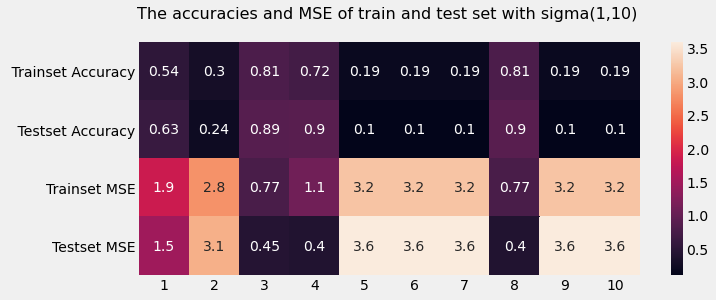

In [144]:
#To have a better view of evaluation with heatmap
acc_mse2=pd.DataFrame([acc_train2,acc_test2,error_train2,error_test2],index=[" Trainset Accuracy"," Testset Accuracy",
                    "Trainset MSE", "Testset MSE"],columns=[1,2,3,4,5,6,7,8,9,10])
plt.figure(figsize=(10,4))
sns.heatmap(acc_mse2,annot=True)
plt.title('The accuracies and MSE of train and test set with sigma(1,10) \n',fontsize=16)
plt.show()

In [165]:
# The dataframe displaying accuracies and MSE
print("The accuracies and MSE using same input as centroids over sigma range(1,10) is as follows:")
display(acc_mse2)

The accuracies and MSE using same input as centroids over sigma range(1,10) is as follows:


,1,2,3,4,5,6,7,8,9,10
Trainset Accuracy,0.536932,0.298295,0.806818,0.724432,0.193182,0.193182,0.193182,0.806818,0.193182,0.193182
Testset Accuracy,0.629213,0.235955,0.887640,0.898876,0.101124,0.101124,0.101124,0.898876,0.101124,0.101124
Trainset MSE,1.852273,2.806818,0.772727,1.102273,3.227273,3.227273,3.227273,0.772727,3.227273,3.227273
Testset MSE,1.483146,3.056180,0.449438,0.404494,3.595506,3.595506,3.595506,0.404494,3.595506,3.595506


Here, from the figure it is evident that the maximum accuracy amd least mean squared error is achieved at sigma = 8 .

#### Best found Parameter:
From above observation from both ranges, that maximum accuracy and minimum MSE is achieved at sigma = 8. So, it is best found parameter of spread function in given range.

## Problem 3
## Part 2 
### a) Choosing 150 centroids randomly:

#### Using different sigmas:
The different sigmas used for comparision are 0.1,1 and 10.
Apart from it, computed sigma is used derived from calculation depending upon dataset and best found sigma (i.e., 8) is used which is achieved from previous parameter tuning with 352 same centroids.

In [138]:
# To evaluate on range of sigma(0.1,1,computed_sigma,8(best found parameter),10) and plotting it through line graph
sigmas= [0.1,1,computed_sigma,8,10]
acc_trainset1=[]
err_trainset1=[]
acc_testset1=[]
err_testset1=[]
for sigma in sigmas:
    predict3= RBF(x_train, y_train,150,sigma, method_basis="random")
    pred_trainset1 = predict3(x_train)
    pred_testset1 = predict3(x_test)
    acc_trainset1.append(metrics.accuracy_score(y_train,pred_trainset1))
    err_trainset1.append(mean_squared_error(y_train,pred_trainset1))
    acc_testset1.append(metrics.accuracy_score(y_test,pred_testset1))
    err_testset1.append(mean_squared_error(y_test,pred_testset1))

#### Results:

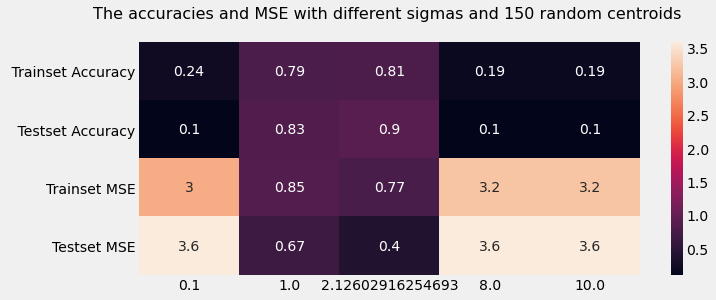

In [139]:
#To have a better view of evaluation with heatmap
accMseR=pd.DataFrame([acc_trainset1,acc_testset1,err_trainset1,err_testset1],index=[" Trainset Accuracy"," Testset Accuracy",
                    "Trainset MSE", "Testset MSE"],columns=[0.1,1,computed_sigma,8,10])
plt.figure(figsize=(10,4))
sns.heatmap(accMseR,annot=True)
plt.title('The accuracies and MSE with different sigmas and 150 random centroids \n',fontsize=16)
plt.show()

In [163]:
# The dataframe displaying accuracies and MSE
print("The accuracies and MSE with different sigmas and 150 random centroids are as follows:")
display(accMseR)

The accuracies and MSE with different sigmas and 150 random centroids are as follows:


,0.100000,1.000000,2.126029,8.000000,10.000000
Trainset Accuracy,0.241477,0.786932,0.806818,0.193182,0.193182
Testset Accuracy,0.101124,0.831461,0.898876,0.101124,0.101124
Trainset MSE,3.034091,0.852273,0.772727,3.227273,3.227273
Testset MSE,3.595506,0.674157,0.404494,3.595506,3.595506


Here, The maximum accuracy and least MSE is achieved at computed sigma i.e , sigma = 2.12

## Problem 3
## Part 2 
### b) Choosing 150 centroids using KMeans:

#### Using different sigmas:
The different sigmas used for comparision are 0.1,1 and 10.
Apart from it, computed sigma is used derived from calculation depending upon dataset and best found sigma (i.e., 8) is used which is achieved from previous parameter tuning with 352 same centroids.

In [150]:
# To evaluate on range of sigma(0.1,1,computed_sigma,8(best found parameter),10) and plotting it through line graph
acc_trainset2=[]
err_trainset2=[]
acc_testset2=[]
err_testset2=[]
for sigma in sigmas:
    predict4= RBF(x_train, y_train,150,sigma, method_basis="kmean")
    pred_trainset2 = predict4(x_train)
    pred_testset2 = predict4(x_test)
    acc_trainset2.append(metrics.accuracy_score(y_train,pred_trainset2))
    err_trainset2.append(mean_squared_error(y_train,pred_trainset2))
    acc_testset2.append(metrics.accuracy_score(y_test,pred_testset2))
    err_testset2.append(mean_squared_error(y_test,pred_testset2))

<ipython-input-113-958eb62fc112>:38: RuntimeWarning: invalid value encountered in less_equal
  if pr <=1:
<ipython-input-113-958eb62fc112>:38: RuntimeWarning: invalid value encountered in less_equal
  if pr <=1:
<ipython-input-113-958eb62fc112>:38: RuntimeWarning: invalid value encountered in less_equal
  if pr <=1:
<ipython-input-113-958eb62fc112>:38: RuntimeWarning: invalid value encountered in less_equal
  if pr <=1:
<ipython-input-113-958eb62fc112>:38: RuntimeWarning: invalid value encountered in less_equal
  if pr <=1:


#### Results:

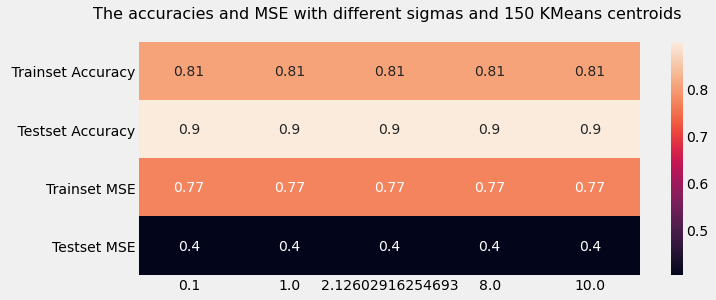

In [153]:
#To have a better view of evaluation with heatmap
accMseK=pd.DataFrame([acc_trainset2,acc_testset2,err_trainset2,err_testset2],index=[" Trainset Accuracy"," Testset Accuracy",
                    "Trainset MSE", "Testset MSE"],columns=[0.1,1,computed_sigma,8,10])
plt.figure(figsize=(10,4))
sns.heatmap(accMseK,annot=True)
plt.title('The accuracies and MSE with different sigmas and 150 KMeans centroids \n',fontsize=16)
plt.show()

In [152]:
# The dataframe displaying accuracies and MSE
print("The accuracies and MSE with different sigmas and 150 KMeans centroids are as follows:")
display(accMseK)

The accuracies and MSE with different sigmas and 150 KMeans centroids are as follows:


,0.100000,1.000000,2.126029,8.000000,10.000000
Trainset Accuracy,0.806818,0.806818,0.806818,0.806818,0.806818
Testset Accuracy,0.898876,0.898876,0.898876,0.898876,0.898876
Trainset MSE,0.772727,0.772727,0.772727,0.772727,0.772727
Testset MSE,0.404494,0.404494,0.404494,0.404494,0.404494


Here, accuraies and MSE are same of all the provided sigma values.

## Comparision between all the three implementations:

In these various implementations, the role of many factors are evaluated such as choosing the number of centroids, method of choosing them and then, variation of sigma. So, the observation is as follows:
#### a) same centroids as training data:
here, when same training data is used as centroids and according to various values of sigma implemented, the highest accuracy observed is at sigma = 8 of 0.9.
#### b) 150 randomly chosen centroids :
here, unlike all the implementations it provided the least accuracies amoung the given range of values. But, surprisingly, on few points such as sigma = 1 and computed sigma of 0.83 and 0.9
#### c) 150 Kmeans clustered centroids:
here, the maximum accuracy of 0.9 is achieved almost at every provided sigma values which also tells, that its the most efficient method to implement rbf. Also, it provides good accuracies and less meam squared error among all the three implementatins.
#### for centroids:
In our observation, the number of centroids matters, as in a) 352 centroids are used which provides maximum accuracy of ,approximately 0.9 at sigma=8 and unlike other at computed sigma it provided rather low accuracy , whereas in b) and c) , 150 centroids provided, more accuracy of nearly, 0.9 at computed.

So, considering computed sigma to compare all, it can be said that more no, of centroids , less the accuracy.
#### for sigma:
for sigma in b) , the smaller(sigma=0.1)and larger(sigma=1) both provided least accuracies and large errors. This may happen because if value of sigma is large,it will lead to information loss and in case of small , it does not interpolate properly.
So, spread paramter around 2.12 here, provided good accuracy.

#### for methods:
it is clear from all the three observations, that KMean clustering algorithm for choosing centroids provided maximum accuracy, even with range of sigma values. Although b) implementation , random largely depend upon sigma and same for the a) model.


#### Conclusion:
Therefore, different combinations of all these three factors provides different results, but , the following are the interpretations from all three model implementations with varying parameters.

1) The more the number of centroids the less, accurate the data is.

2) Sigma should be neither too large nor, too small.

1) Most suitable method for choosing centroids turns out to be using KMean clustering algorithm , among all three.